# Question 3.1

In [34]:
import pandas
import matplotlib.pyplot as plt
import seaborn 

In [57]:
data = pandas.read_csv('../SQL(DataBase)/question_3 (1).csv')

In [58]:
columns_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

In [59]:
columns_to_plot = [col for col in columns_to_plot if col not in ['ID', 'quality']]

In [60]:
num_rows = 3
num_cols = 4

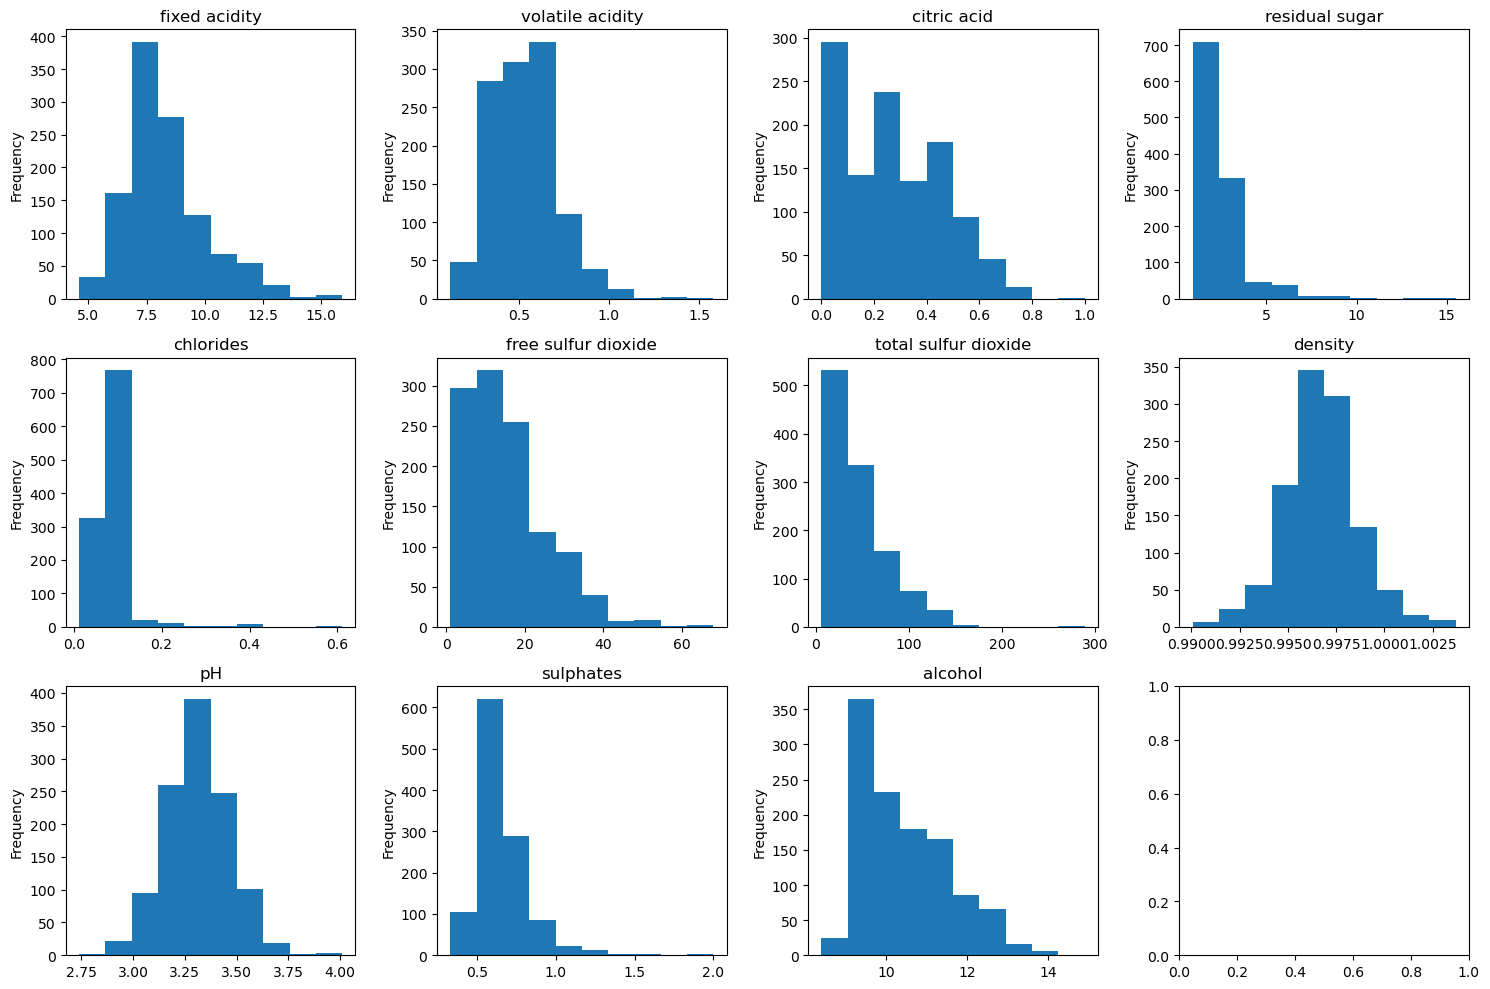

In [61]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    data[column].plot(kind='hist', ax=ax, title=column)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show() 

# Question 3.2
 
 Except for the frequency- density and frequency- pH diagrams which are almost normally distributed with the majority of data points clustered around the central range of values, the rest of the diagrams are considered to be right skewed meaning that each single one has a longer tail on the right side. This is caused by the outliers being further out towards the right and closer to the mean on the left, which can provide misleading results.

# Question 3.3

In [62]:
columns_for_correlation = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

In [63]:
correlation_matrix = data[columns_for_correlation].corr()

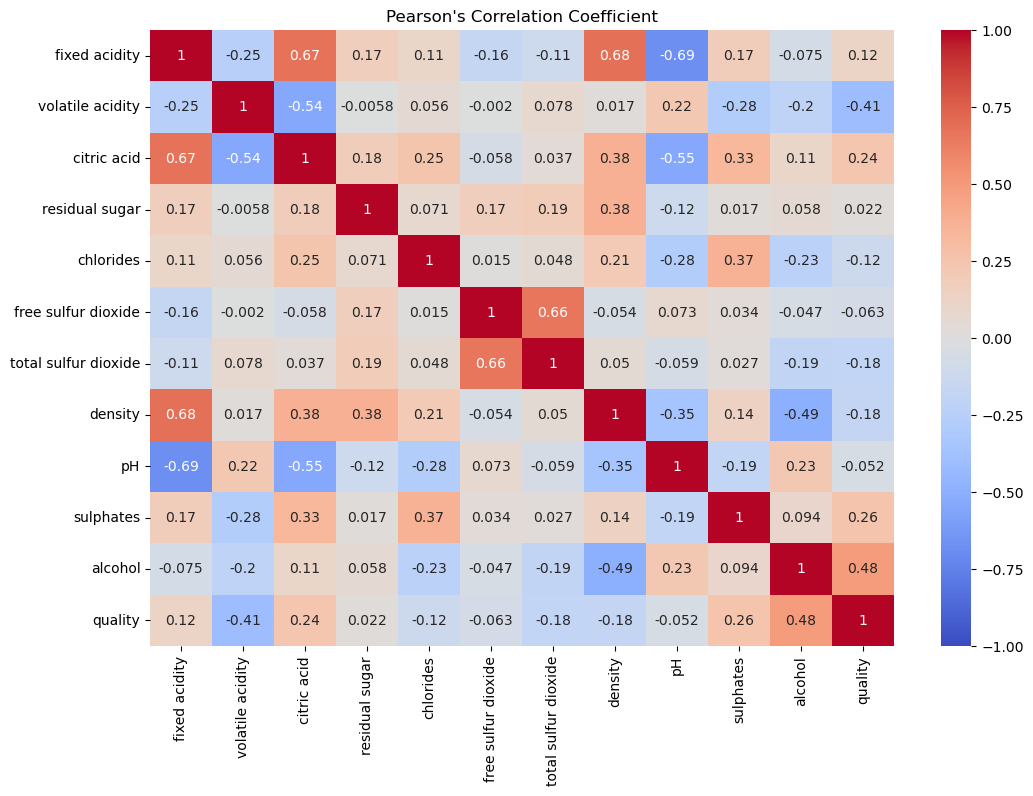

In [42]:
#heatmap

plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Pearson's Correlation Coefficient")
plt.show()

# Question 3.4

In [64]:
positive_corr_pairs = []
for column in correlation_matrix.columns:
    pairs = correlation_matrix[column][correlation_matrix[column] > 0].sort_values(ascending=False)
    for pair, correlation in pairs.items():
        if column != pair:  # Exclude self-correlations
            positive_corr_pairs.append((column, pair, correlation))

In [65]:
positive_corr_pairs = sorted(positive_corr_pairs, key=lambda x: x[2], reverse=True)[:5]
print("Top 5 Variable Pairs with Positive Correlation:")
for pair in positive_corr_pairs:
    print(pair)

Top 5 Variable Pairs with Positive Correlation:
('fixed acidity', 'density', 0.6815008826691703)
('density', 'fixed acidity', 0.6815008826691703)
('fixed acidity', 'citric acid', 0.6731572507629235)
('citric acid', 'fixed acidity', 0.6731572507629235)
('free sulfur dioxide', 'total sulfur dioxide', 0.6610928721834333)


In [66]:
negative_corr_pairs = []
for column in correlation_matrix.columns:
    pairs = correlation_matrix[column][correlation_matrix[column] < 0].sort_values()
    for pair, correlation in pairs.items():
        if column != pair:  # Exclude self-correlations
            negative_corr_pairs.append((column, pair, correlation))

In [68]:
negative_corr_pairs = sorted(negative_corr_pairs, key=lambda x: x[2])[:5]
print("\nTop 5 Variable Pairs with Negative Correlation:")
for pair in negative_corr_pairs:
    print(pair)


Top 5 Variable Pairs with Negative Correlation:
('fixed acidity', 'pH', -0.6851625988235482)
('pH', 'fixed acidity', -0.6851625988235482)
('citric acid', 'pH', -0.5463391381265055)
('pH', 'citric acid', -0.5463391381265055)
('volatile acidity', 'citric acid', -0.5441869374183994)


# Question 3.5

In [69]:
positive_corr_pairs = [
    ('fixed acidity', 'density'),
    ('fixed acidity', 'citric acid'),
    ('free sulfur dioxide', 'total sulfur dioxide')
]

In [70]:
negative_corr_pairs = [
    ('fixed acidity', 'pH'),
    ('citric acid', 'pH'),
    ('volatile acidity', 'citric acid')
]

In [71]:
num_rows = 2
num_cols = 5 if len(positive_corr_pairs) + len(negative_corr_pairs) >= 5 else len(positive_corr_pairs) + len(negative_corr_pairs)


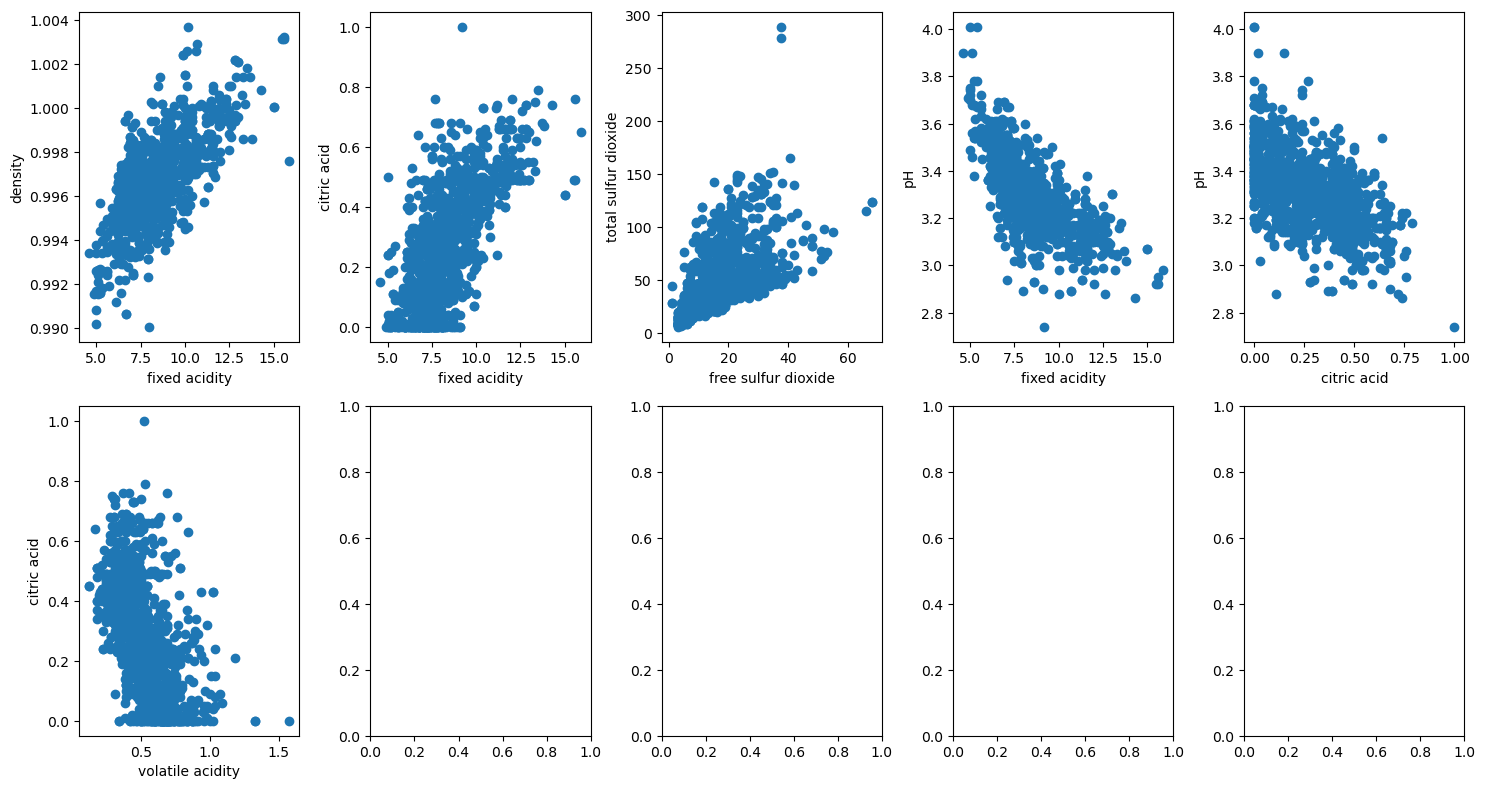

In [72]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

axes = axes.flatten()
#Plot scatter positive correlation

for i, (x, y) in enumerate(positive_corr_pairs):
    ax = axes[i]
    ax.scatter(data[x], data[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    
#Plot negative correlation
for i, (x, y) in enumerate(negative_corr_pairs):
    ax = axes[i + len(positive_corr_pairs)]
    ax.scatter(data[x], data[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
plt.tight_layout()

plt.show()
